In [54]:
import pandas as pd
import datetime as dt
from glob import glob
from game_log import load_current_line
import matplotlib.pyplot as plt

In [55]:
today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'


pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time')
unabated = load_current_line(unabated_path,'prop_id','time')

In [56]:
events = glob('pbp/pbp_events/pbp_events*')

In [57]:
events[0]

'pbp/pbp_events\\pbp_events_0022200001.csv'

In [58]:
df = pd.concat(map(lambda x: pd.read_csv(x, index_col=0,dtype={'game_id':str}), events)) 
df.sample(2)

,game_id,player_id,player_name,play_elapsed_time,play_end_time,team,opp,H/A,off_poss,def_poss,...,3PA,TRB,DRB,ORB,STL,BLK,TOV,PF,AST,PTS
1456,0022201121,1627780,Gary Payton II,22.0,1056.0,GSW,MIN,1,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1244,0022201042,1628971,Bruce Brown,10.0,919.0,DEN,DET,0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#df.to_csv('pbp/pbp_events/events_all.csv')

In [60]:
box_scores = glob('pbp/box_scores/box_*')
box_df = pd.concat(map(lambda x: pd.read_csv(x, index_col=0,dtype={'game_id':str}), box_scores)) 
box_df
#one_game = pd.read_csv('pbp/box_scores/box_0022300142.csv',index_col=0)
#one_game['min'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60)

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,nickname,start_position,comment,min,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,0022200001,1610612755,PHI,Philadelphia,202699,Tobias Harris,Tobias,F,NaN,34.000000:14,...,1.0,1.0,2.0,0.0,3.0,0.0,0.0,3.0,18.0,-1.0
1,0022200001,1610612755,PHI,Philadelphia,200782,P.J. Tucker,P.J.,F,NaN,33.000000:01,...,2.0,2.0,4.0,0.0,0.0,1.0,2.0,2.0,6.0,-6.0
2,0022200001,1610612755,PHI,Philadelphia,203954,Joel Embiid,Joel,C,NaN,37.000000:16,...,1.0,14.0,15.0,5.0,0.0,1.0,6.0,4.0,26.0,-13.0
3,0022200001,1610612755,PHI,Philadelphia,1630178,Tyrese Maxey,Tyrese,G,NaN,38.000000:12,...,0.0,1.0,1.0,2.0,2.0,0.0,1.0,5.0,21.0,-6.0
4,0022200001,1610612755,PHI,Philadelphia,201935,James Harden,James,G,NaN,37.000000:16,...,0.0,8.0,8.0,7.0,0.0,0.0,3.0,3.0,35.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0022300187,1610612747,LAL,Los Angeles,1631108,Max Christie,Max,NaN,NaN,12.000000:37,...,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22,0022300187,1610612747,LAL,Los Angeles,1629637,Jaxson Hayes,Jaxson,NaN,NaN,7.000000:00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,-11.0
23,0022300187,1610612747,LAL,Los Angeles,1641788,Alex Fudge,Alex,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0022300187,1610612747,LAL,Los Angeles,1641793,D'Moi Hodge,D'Moi,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#box_df_2 = box_df.dropna()
def split_time(x):
    if type(x)==str:
        return float(x.split(':')[0]) + float(x.split(':')[1])/60
    else:
        return x
box_df['min'] = box_df['min'].apply(lambda x: split_time(x))
box_df

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,nickname,start_position,comment,min,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,0022200001,1610612755,PHI,Philadelphia,202699,Tobias Harris,Tobias,F,NaN,34.233333,...,1.0,1.0,2.0,0.0,3.0,0.0,0.0,3.0,18.0,-1.0
1,0022200001,1610612755,PHI,Philadelphia,200782,P.J. Tucker,P.J.,F,NaN,33.016667,...,2.0,2.0,4.0,0.0,0.0,1.0,2.0,2.0,6.0,-6.0
2,0022200001,1610612755,PHI,Philadelphia,203954,Joel Embiid,Joel,C,NaN,37.266667,...,1.0,14.0,15.0,5.0,0.0,1.0,6.0,4.0,26.0,-13.0
3,0022200001,1610612755,PHI,Philadelphia,1630178,Tyrese Maxey,Tyrese,G,NaN,38.200000,...,0.0,1.0,1.0,2.0,2.0,0.0,1.0,5.0,21.0,-6.0
4,0022200001,1610612755,PHI,Philadelphia,201935,James Harden,James,G,NaN,37.266667,...,0.0,8.0,8.0,7.0,0.0,0.0,3.0,3.0,35.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0022300187,1610612747,LAL,Los Angeles,1631108,Max Christie,Max,NaN,NaN,12.616667,...,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22,0022300187,1610612747,LAL,Los Angeles,1629637,Jaxson Hayes,Jaxson,NaN,NaN,7.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,-11.0
23,0022300187,1610612747,LAL,Los Angeles,1641788,Alex Fudge,Alex,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0022300187,1610612747,LAL,Los Angeles,1641793,D'Moi Hodge,D'Moi,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
steph_box = box_df[box_df.player_name=='Stephen Curry']
steph_box['mpg_avg'] = steph_box['min'].rolling(5,min_periods=1).mean()
steph_box['pts'].sum()

C:\Users\Shared.Westover\AppData\Local\Temp\ipykernel_23092\3639066406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_box['mpg_avg'] = steph_box['min'].rolling(5,min_periods=1).mean()


1986.0

In [63]:
def rolling_shooting_percentage(df,player_name,three=False) -> pd.Series:
    player_df = df.loc[(df.player_name==player_name) & (df[f'off_poss'] != 0)].sort_values(by=['game_id','play_end_time']).reset_index(drop=True)
    if len(player_df) == 0:
        print('did you spell their name right?')
    if three == False:
        return player_df['3PM'].rolling(window=1000,min_periods=400).sum()/player_df['3PA'].rolling(window=2000,min_periods=400).sum()

In [87]:
curry = df.loc[(df.player_name=='Kevon Looney')].sort_values(by=['game_id','play_end_time']).reset_index(drop=True)
curry['pts_per_poss'] = curry['PTS'].rolling(window=1000,min_periods=400).mean() * 2
curry['mpg'] = curry.groupby(['game_id'])['play_elapsed_time'].transform('sum')/60
curry = curry.merge(steph_box[['game_id','min','mpg_avg']],on='game_id')
curry['pts_expected'] = curry['pts_per_poss'] * (105/48) * curry['mpg_avg']
curry

,game_id,player_id,player_name,play_elapsed_time,play_end_time,team,opp,H/A,off_poss,def_poss,...,BLK,TOV,PF,AST,PTS,pts_per_poss,mpg,min,mpg_avg,pts_expected
0,0022200002,1626172,Kevon Looney,23.0,23.0,GSW,LAL,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,NaN,21.133333,32.800000,32.80,NaN
1,0022200002,1626172,Kevon Looney,20.0,43.0,GSW,LAL,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,21.133333,32.800000,32.80,NaN
2,0022200002,1626172,Kevon Looney,8.0,51.0,GSW,LAL,1,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,21.133333,32.800000,32.80,NaN
3,0022200002,1626172,Kevon Looney,12.0,63.0,GSW,LAL,1,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,21.133333,32.800000,32.80,NaN
4,0022200002,1626172,Kevon Looney,22.0,85.0,GSW,LAL,1,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,NaN,21.133333,32.800000,32.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,0022300186,1626172,Kevon Looney,19.0,2417.0,GSW,MIN,1,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.112,19.050000,36.133333,33.32,8.16340
6948,0022300186,1626172,Kevon Looney,14.0,2431.0,GSW,MIN,1,0.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.112,19.050000,36.133333,33.32,8.16340
6949,0022300186,1626172,Kevon Looney,17.0,2448.0,GSW,MIN,1,76.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.116,19.050000,36.133333,33.32,8.45495
6950,0022300186,1626172,Kevon Looney,23.0,2471.0,GSW,MIN,1,0.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.116,19.050000,36.133333,33.32,8.45495


In [92]:
curry_off = curry.loc[(curry.off_poss != 0) & (curry.play_elapsed_time != 0) & (curry.game_id.str.contains('223'))]
curry23 = curry.loc[(curry.game_id.str.contains('223'))]
#(curry_off.groupby('game_id')['PTS'].sum() / curry_off.groupby('game_id')['off_poss'].count() ).mean()
((curry23['TRB'].sum()) / curry23.groupby(['game_id','off_poss','def_poss']).ngroups)*200
#0.4193 when I do sum pts / nunique.mean
#0.39009 when I do sum pts / count of nonzero play times lol
#0.34675 when i do sum pts /count

18.81881881881882

In [93]:
print(curry23['TRB'].sum())
print(curry23.groupby(['game_id','off_poss','def_poss']).ngroups)

94.0
999


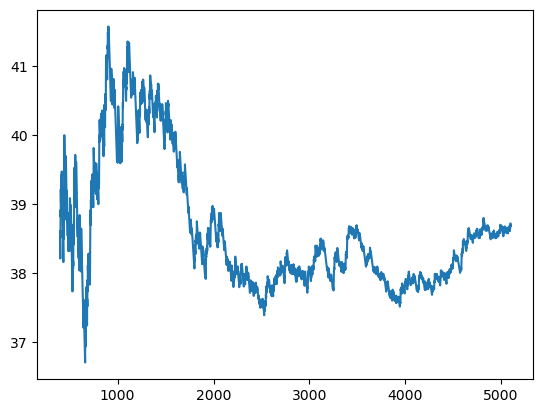

In [90]:
def rolling_per_poss_rate(df,player_name,stat,side='both') -> pd.Series:
    if side == 'both':
        player_df = df.loc[(df.player_name==player_name)].sort_values(by=['game_id','play_end_time']).reset_index(drop=True)
        multiplier = 200
    else:
        player_df = df.loc[(df.player_name==player_name) & (df[f'{side}_poss'] != 0)].sort_values(by=['game_id','play_end_time'])
        multiplier = 100
    if len(player_df) == 0:
        print('did you spell their name right?')
    return player_df[stat].rolling(window=9000,min_periods=400).mean() * multiplier


trae_pts = rolling_per_poss_rate(df, 'Stephen Curry', 'PTS','off')
plt.plot(trae_pts.reset_index(drop=True))
#plt.ylim(10,40)

TypeError: unhashable type: 'numpy.ndarray'

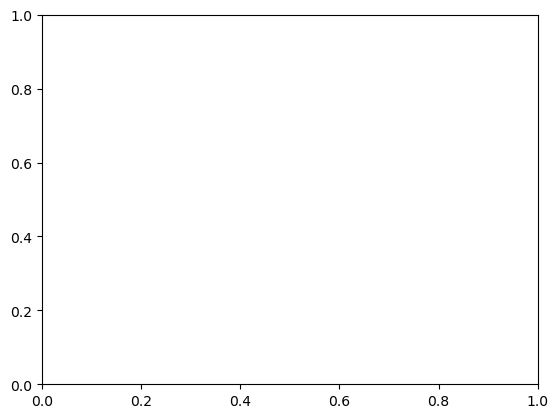

In [67]:
def get_mpg_avg(df,player_name,window) -> pd.Series:
    player_df = df.loc[df.player_name==player_name][['game_id','play_elapsed_time']]
    if len(player_df) == 0:
        print('did you spell their name right?')
    mpg = player_df.groupby('game_id').sum().reset_index()
    return mpg
    #rolling = mpg.rolling(window=window,min_periods=2)['play_elapsed_time'].mean()/60
    #return rolling.reset_index(drop=True)
trae_mpg = get_mpg_avg(df,'Trae Young',5)
trae_mpg
plt.plot(trae_mpg)

In [ ]:
nba = pp_lines.loc[pp_lines.league_name=='NBA'].reset_index(drop=True)
nba.stat.replace('3P','3PM',inplace=True)

In [ ]:
'PTS+TRB'.split('+')

['PTS', 'TRB']

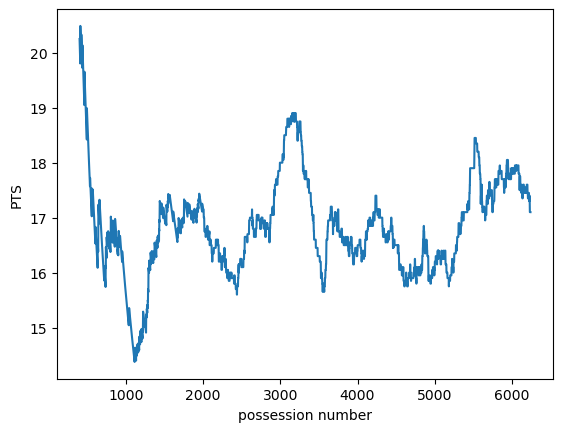

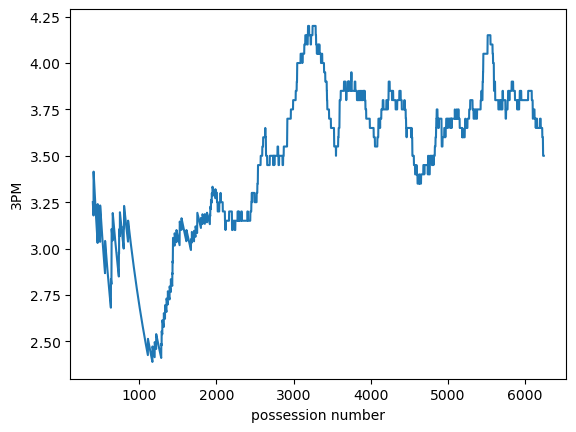

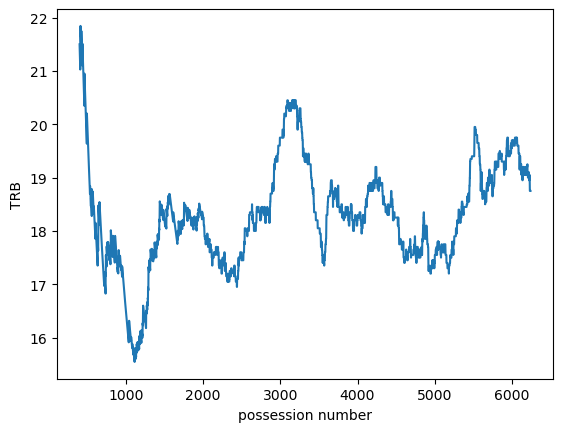

In [ ]:
for n in range(0,3):
    row = nba.iloc[n]
    player = row['player']
    stat = row['stat']
    for num,stat in enumerate(stat.split('+')):
        if num == 0:
            x = rolling_per_poss_rate(df, player, stat,'off').reset_index(drop=True)
        else:
            x += rolling_per_poss_rate(df, player, stat,'off').reset_index(drop=True)
    plt.plot(x)
    plt.xlabel('possession number')
    plt.ylabel(stat)
    plt.show()


In [ ]:
nba['player'][0]

'Keegan Murray'